Importing libs 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier


Fetching and splitting

In [2]:
data = pd.read_csv('train1.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296209 entries, 0 to 296208
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              296209 non-null  int64  
 1   ps_ind_02_cat   296084 non-null  float64
 2   ps_ind_04_cat   296164 non-null  float64
 3   ps_ind_05_cat   293294 non-null  float64
 4   ps_car_01_cat   296152 non-null  float64
 5   ps_car_02_cat   296206 non-null  float64
 6   ps_car_03_cat   91620 non-null   float64
 7   ps_car_04_cat   296209 non-null  int64  
 8   ps_car_05_cat   163922 non-null  float64
 9   ps_car_06_cat   296209 non-null  int64  
 10  ps_car_07_cat   290426 non-null  float64
 11  ps_car_08_cat   296209 non-null  int64  
 12  ps_car_09_cat   295921 non-null  float64
 13  ps_car_10_cat   296209 non-null  int64  
 14  ps_car_11_cat   296209 non-null  int64  
 15  ps_ind_01       296209 non-null  int64  
 16  ps_ind_03       296209 non-null  int64  
 17  ps_ind_06_

,id,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,...,ps_calc_20_bin,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,1158448,1.0,1.0,0.0,7.0,1.0,1.0,0,1.0,10,...,0,0,4.136926,3,0.777766,25,0.165477,3.010493,16,0
1,341018,2.0,1.0,0.0,7.0,1.0,NaN,0,NaN,11,...,0,0,0.592341,3,0.770527,1,0.592340,3.036803,16,0
2,699143,2.0,0.0,0.0,4.0,1.0,NaN,0,1.0,1,...,0,0,0.950207,6,0.757445,4,0.237552,2.536030,16,0
3,744070,1.0,1.0,0.0,3.0,1.0,NaN,2,NaN,1,...,1,0,2.013771,5,NaN,4,0.503442,3.251724,15,0
4,639390,2.0,0.0,0.0,11.0,1.0,NaN,2,NaN,11,...,0,0,0.000000,3,0.767450,0,793360.881100,2.703617,18,1


In [3]:
data.shape

(296209, 67)

In [24]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=27857   #this test is 'validation' set and my erp is 27857 (karam)
)


In [25]:
print(f"Target distribution:\n{y.value_counts()}")

Target distribution:
target
0    281023
1     15186
Name: count, dtype: int64


Imputing 

In [83]:
from sklearn.impute import SimpleImputer

bin_cols = [c for c in X_train.columns if '_bin' in c]
cat_cols = [c for c in X_train.columns if '_cat' in c]
num_cols = [c for c in X_train.columns if c not in bin_cols + cat_cols + ['id']]

# Categorical columns → mode (most_frequent)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# Fill numeric NaNs with median from training data
median_vals = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(median_vals)
X_test[num_cols] = X_test[num_cols].fillna(median_vals)

# fill binary columns with mode
imputer_bin = SimpleImputer(strategy='most_frequent')
X_train[bin_cols] = imputer_bin.fit_transform(X_train[bin_cols])
X_test[bin_cols] = imputer_bin.transform(X_test[bin_cols])



In [84]:
print("Binary cols:", len(bin_cols))
print("Categorical cols:", len(cat_cols))
print("Numeric cols:", len(num_cols))

print("Binary Columns ({}):".format(len(bin_cols)), bin_cols, "\n")
print("Categorical Columns ({}):".format(len(cat_cols)), cat_cols, "\n")
print("Numeric Columns ({}):".format(len(num_cols)), num_cols)


Binary cols: 17
Categorical cols: 14
Numeric cols: 34
Binary Columns (17): ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'] 

Categorical Columns (14): ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

Numeric Columns (34): ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',

In [85]:
X_train.isna().sum().sum(), X_test.isna().sum().sum() #no more Na columns


(0, 0)

In [86]:
# Convert all categorical (_cat) columns to category dtype
for c in cat_cols:
    X_train[c] = X_train[c].astype('category')
    X_test[c] = X_test[c].astype('category')


In [87]:
X_train.dtypes.value_counts()


int64       37
float64     15
category     6
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

Baseline DT AUROC

In [32]:
#baseline TREE AUROC -->> 0.5107
model = DecisionTreeClassifier(random_state=27857)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
baseline_auroc = roc_auc_score(y_test, y_pred)

print("Baseline AUROC:", baseline_auroc)


Baseline AUROC: 0.510718796954835


Filtering features (ANOVA + Chi2)

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2 

# --- Confirm column groups --- -->>> 0.5076
print("Number of binary columns:", len(bin_cols))
print("Number of categorical columns:", len(cat_cols))
print("Number of numeric columns:", len(num_cols))

# ✅ Use ANOVA (f_classif) for numeric features
anova_selector = SelectKBest(score_func=f_classif, k=min(15, len(num_cols)))
anova_selector.fit(X_train[num_cols], y_train)
selected_num = np.array(num_cols)[anova_selector.get_support()]

# ✅ Use Chi-Square for categorical + binary (non-negative, discrete)
# Combine binary and categorical since both are discrete numeric
cat_bin_cols = bin_cols + cat_cols

chi_selector = SelectKBest(score_func=chi2, k=min(15, len(cat_bin_cols)))
chi_selector.fit(X_train[cat_bin_cols], y_train)
selected_catbin = np.array(cat_bin_cols)[chi_selector.get_support()]

# ✅ Combine both selected feature sets
selected_features = list(selected_num) + list(selected_catbin)

print("\nSelected numeric features (ANOVA):")
print(selected_num)

print("\nSelected binary + categorical features (Chi-Square):")
print(selected_catbin)

print("\n✅ Combined selected features:")
print(selected_features)

# --- Train Decision Tree on selected features ---
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model_fs = DecisionTreeClassifier(random_state=27857)
model_fs.fit(X_train_sel, y_train)

# --- Evaluate using AUROC ---
y_pred = model_fs.predict_proba(X_test_sel)[:, 1]
auroc_fs = roc_auc_score(y_test, y_pred)

print("\n🌟 AUROC after ANOVA + Chi-Square feature selection:", auroc_fs)


Number of binary columns: 17
Number of categorical columns: 14
Number of numeric columns: 34


C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Selected numeric features (ANOVA):
['ps_ind_01' 'ps_ind_03' 'ps_ind_14' 'ps_ind_15' 'ps_reg_01' 'ps_reg_02'
 'ps_reg_03' 'ps_car_12' 'ps_car_13' 'ps_car_14' 'ps_car_15' 'feature2'
 'feature4' 'feature5' 'feature7']

Selected binary + categorical features (Chi-Square):
['ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_car_01_cat' 'ps_car_02_cat' 'ps_car_04_cat' 'ps_car_06_cat'
 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_11_cat']

✅ Combined selected features:
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'feature2', 'feature4', 'feature5', 'feature7', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat']

🌟 AURO

Forward Selection (all features)

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# --- Base model ---
base_model = DecisionTreeClassifier(random_state=27857)

# --- Forward Selection ---
sfs_forward = SFS(
    base_model,
    k_features=10,              # Select top 10 features
    forward=True,               # Forward stepwise
    floating=False,             # No floating (simple forward)
    scoring='roc_auc',          # Use AUROC for selection
    cv=5,                       # 5-fold CV
    n_jobs=1,                  # Use all cores
    verbose=2                   # Show progress
)

# Fit the SFS
sfs_forward = sfs_forward.fit(X_train, y_train)

# --- Get selected features ---
selected_forward = list(sfs_forward.k_feature_names_)
print("\n✅ Forward Selection Features:")
print(selected_forward)

# --- Evaluate model on selected features ---
X_train_sfs = X_train[selected_forward]
X_test_sfs = X_test[selected_forward]

model_sfs = DecisionTreeClassifier(random_state=27857)
model_sfs.fit(X_train_sfs, y_train)

y_pred = model_sfs.predict_proba(X_test_sfs)[:, 1]
auroc_sfs = roc_auc_score(y_test, y_pred)

print("\n🌟 AUROC after Forward Feature Selection:", auroc_sfs)


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  2.9min finished

[2025-10-31 18:31:10] Features: 1/10 -- score: 0.5660316991785357[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.1min finished

[2025-10-31 18:33:16] Features: 2/10 -- score: 0.5769854215218637[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.3min finished

[2025-10-31 18:35:37] Features: 3/10 -- score: 0.5826134120745402[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  2.5min finished

[2025-10-31 18:38:07] Features: 4/10 -- score: 0.5841370433268056[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:  2.4min finished

[2025-10-31 18:40:32] Features: 5/10 -- score: 0.5843729421040266[Parallel(n_job


✅ Forward Selection Features:
['ps_car_04_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_06_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin', 'ps_ind_17_bin', 'feature1']

🌟 AUROC after Forward Feature Selection: 0.5775532766858615


Backward Selection (with subset features)

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time

# ==============================================
# Use the features selected by ANOVA + Chi2
# ==============================================
selected_features_fs = [
'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15','ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12',
'ps_car_13', 'ps_car_14', 'ps_car_15', 'feature2','feature4', 'feature5', 'feature7', 'ps_ind_06_bin',
'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin','ps_ind_16_bin','ps_ind_17_bin', 'ps_ind_04_cat',
'ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat',
'ps_car_09_cat', 'ps_car_11_cat'

]

print("Number of input features for backward selection:", len(selected_features_fs))

# ==============================================
# Subset the training and testing data
# ==============================================
X_train_fs = X_train[selected_features_fs]
X_test_fs  = X_test[selected_features_fs]

# ==============================================
# Backward Feature Selection
# ==============================================
base_model = DecisionTreeClassifier(random_state=27857)

sfs_backward = SFS(
    base_model,
    k_features=15,        # Finds optimal number of features automatically
    forward=False,            # Backward elimination
    floating=False,
    scoring='roc_auc',
    cv=3,                     # 3-fold CV to keep it faster
    n_jobs=1,                # Use all CPU cores
    verbose=2                 # Show progress
)

sfs_backward = sfs_backward.fit(X_train_fs, y_train)

# Get selected features
selected_backward = list(sfs_backward.k_feature_names_)
print("\n✅ Backward selection chosen features:")
print(selected_backward)

# ==============================================
# Evaluate the model on the selected features
# ==============================================
X_train_sfs = X_train[selected_backward]
X_test_sfs  = X_test[selected_backward]

model_sfs = DecisionTreeClassifier(random_state=27857)
model_sfs.fit(X_train_sfs, y_train)

y_pred = model_sfs.predict_proba(X_test_sfs)[:, 1]
auroc_sfs = roc_auc_score(y_test, y_pred)

print("\n🔥 AUROC after backward selection:", round(auroc_sfs, 5))



Number of input features for backward selection: 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.8min finished

[2025-10-31 19:49:31] Features: 29/15 -- score: 0.5125007445928179[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  7.1min finished

[2025-10-31 19:56:34] Features: 28/15 -- score: 0.5133988320948468[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  5.4min finished

[2025-10-31 20:01:58] Features: 27/15 -- score: 0.5137398907448151[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.3min finished

[2025-10-31 20:06:14] Features: 26/15 -- score: 0.5148451370661838[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  4.0min finished

[2025-10-31 20:10:13] Features: 25/15 -- score: 0.5137001618971523[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.8min finished

[2025-10-31 20:14:00] Features: 24/15 -- score: 0.5130783256875143[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  3.5min finished

[2025-10-31 20:17:28] Features: 23/15 -- score: 0.5137832175420914[Parallel(n_jobs=1)]: Done  23 out of  23


✅ Backward selection chosen features:
['ps_ind_03', 'ps_ind_15', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_15', 'feature2', 'feature4', 'feature7', 'ps_ind_06_bin', 'ps_ind_17_bin', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat']

🔥 AUROC after backward selection: 0.5101


Hyperparameter Tuning


In [71]:
from sklearn.model_selection import GridSearchCV

# Combine all features
X_train_final = X_train[num_cols + bin_cols + cat_cols]
y_train_final = y_train

# --- Define the model ---
dt = DecisionTreeClassifier(random_state=27857)

# --- Define hyperparameter grid ---
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# --- Grid Search with 5-fold CV ---
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train_final, y_train_final)

# --- Best results ---
print("\n🔍 Best Hyperparameters:")
print(grid_search.best_params_)

print("\n🏆 Best CV AUROC:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   3.1s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   2.4s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   2.3s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   2.1s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   1.8s


Hyperparamters on Filtered Features (anova + chi2) (30)

Final AUROC (best hyperparameters on Filtered methods, before PCA): 0.6045

Top 10 Important Features of filtered methods:
ps_car_13        0.236778
ps_ind_05_cat    0.091189
ps_ind_17_bin    0.086692
ps_reg_03        0.079926
feature2         0.071738
feature7         0.065871
ps_ind_03        0.055927
ps_ind_15        0.041727
ps_car_14        0.039596
feature4         0.032303
dtype: float64


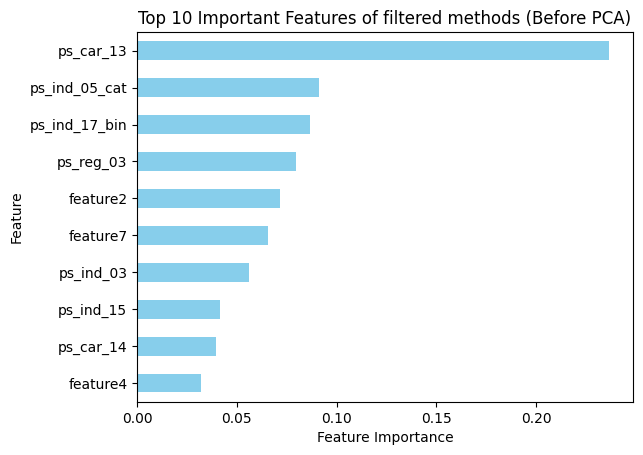

In [78]:
# === Final Feature Importance Analysis (Before PCA) ===
import matplotlib.pyplot as plt

# Using the sleected features thru anova + chi2

# Subset your data
X_train_sel = X_train[selected_features_fs]
X_test_sel = X_test[selected_features_fs]

# Use your best hyperparameters (replace values with your GridSearchCV results)
best_params = {
    'criterion': 'gini',        
    'max_depth': 7,                
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': None,
    'random_state': 27857
}

# Train final model
final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train_sel, y_train)

# Evaluate model
y_pred = final_tree.predict_proba(X_test_sel)[:, 1]
final_auroc = roc_auc_score(y_test, y_pred)
print(f"Final AUROC (best hyperparameters on Filtered methods, before PCA): {final_auroc:.4f}")

# Extract feature importances
importances = final_tree.feature_importances_
feat_imp = pd.Series(importances, index=selected_features_fs).sort_values(ascending=False)

# Show top 10 important features
print("\nTop 10 Important Features of filtered methods:")
print(feat_imp.head(10))

# Plot
feat_imp.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features of filtered methods (Before PCA)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


Hyperparamters on Wrapper Selected features (FW + BW) (22)

Final AUROC (best hyperparameters on Wrapper Selected featuers, before PCA): 0.5944

Top 10 Important Features of wrapper methods:
ps_reg_03        0.134454
ps_ind_17_bin    0.108138
ps_ind_05_cat    0.099237
feature2         0.090536
ps_car_12        0.090119
ps_car_15        0.067880
ps_ind_06_bin    0.064213
ps_car_04_cat    0.064164
feature4         0.053239
ps_ind_03        0.053187
dtype: float64


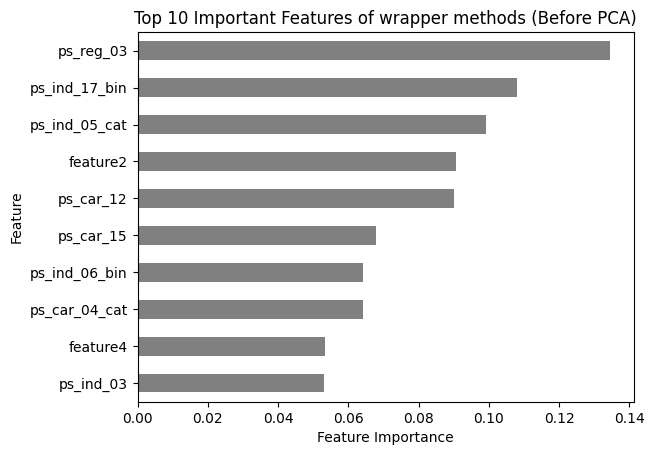

In [81]:
# === Final Feature Importance Analysis (Before PCA) ===
import matplotlib.pyplot as plt

# Using the sleected features of forward selection
sel_features_forward = ['ps_ind_03', 'ps_ind_15', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_15',
 'feature2', 'feature4', 'feature7', 'ps_ind_06_bin', 'ps_ind_17_bin',
 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat',
 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_09_bin', 'ps_ind_10_bin',
 'ps_ind_11_bin', 'ps_ind_13_bin', 'feature1']

# Subset your data
X_train_sel = X_train[sel_features_forward]
X_test_sel = X_test[sel_features_forward]

# Use your best hyperparameters (replace values with your GridSearchCV results)
best_params = {
    'criterion': 'gini',        
    'max_depth': 7,                
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': None,
    'random_state': 27857
}

# Train final model
final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train_sel, y_train)

# Evaluate model
y_pred = final_tree.predict_proba(X_test_sel)[:, 1]
final_auroc = roc_auc_score(y_test, y_pred)
print(f"Final AUROC (best hyperparameters on Wrapper Selected featuers, before PCA): {final_auroc:.4f}")

# Extract feature importances
importances = final_tree.feature_importances_
feat_imp = pd.Series(importances, index=sel_features_forward).sort_values(ascending=False)

# Show top 10 important features
print("\nTop 10 Important Features of wrapper methods:")
print(feat_imp.head(10))

# Plot
feat_imp.head(10).plot(kind='barh', color='grey')
plt.title('Top 10 Important Features of wrapper methods (Before PCA)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()



PCA [on numeric data] + concat(bin,cat) (2 + 31) with Hyperparamters

Number of components capturing 90% variance: 2


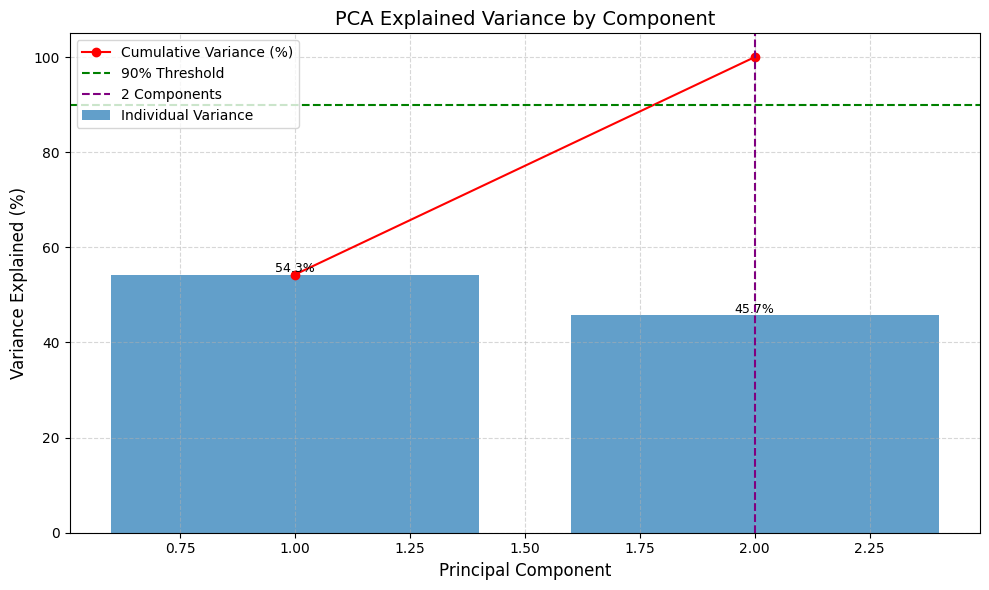

✅ Aligned Shapes:
X_train_final: (207346, 33)
y_train: (207346,)
X_test_final: (88863, 33)
y_test: (88863,)

Final AUROC (After PCA): 0.5911


In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


bin_cat_cols = bin_cols + cat_cols

# =====================================================
# 2️⃣ Fit PCA only on training numeric data
# =====================================================
pca = PCA(n_components=0.90, random_state=27857)  # keep 90% variance
X_train_pca = pca.fit_transform(X_train[num_cols])
X_test_pca = pca.transform(X_test[num_cols])

# === 📊 PCA Variance Plot ===
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.90) + 1

print(f"Number of components capturing 90% variance: {n_components}")

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

pca_df = pd.DataFrame({
    'Component': range(1, len(explained_var) + 1),
    'Explained Variance (%)': explained_var * 100,
    'Cumulative Variance (%)': cum_var * 100
})

plt.figure(figsize=(10,6))
plt.bar(pca_df['Component'], pca_df['Explained Variance (%)'], 
        alpha=0.7, label='Individual Variance')
plt.plot(pca_df['Component'], pca_df['Cumulative Variance (%)'], 
         marker='o', color='red', label='Cumulative Variance (%)')

plt.axhline(90, color='green', linestyle='--', label='90% Threshold')
plt.axvline(n_components, color='purple', linestyle='--', label=f'{n_components} Components')

for i in range(min(10, len(pca_df))):
    plt.text(i+1, explained_var[i]*100 + 0.5, f"{explained_var[i]*100:.1f}%", 
             ha='center', fontsize=9)

plt.title('PCA Explained Variance by Component', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Convert to DataFrames
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PCA_{i}' for i in range(X_train_pca.shape[1])], index=X_train.index)
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PCA_{i}' for i in range(X_test_pca.shape[1])], index=X_test.index)


# =====================================================
# 3️⃣ Combine PCA features with binary + categorical
# =====================================================
X_train_final = pd.concat([X_train_pca, X_train[bin_cat_cols]], axis=1)
X_test_final = pd.concat([X_test_pca, X_test[bin_cat_cols]], axis=1)

print("✅ Aligned Shapes:")
print("X_train_final:", X_train_final.shape)
print("y_train:", y_train.shape)
print("X_test_final:", X_test_final.shape)
print("y_test:", y_test.shape)

# =====================================================
# 4️⃣ Train your Decision Tree
# =====================================================
model_pca = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=27857
)

model_pca.fit(X_train_final, y_train)

y_pred_pca = model_pca.predict_proba(X_test_final)[:, 1]
final_auroc_pca = roc_auc_score(y_test, y_pred_pca)
print(f"\nFinal AUROC (After PCA): {final_auroc_pca:.4f}")



Feature Importance (Top 10 after PCA + Hyperparamters)


Top 10 Important Features (After PCA):
ps_ind_06_bin    0.250019
ps_ind_17_bin    0.211883
ps_ind_05_cat    0.199273
ps_car_01_cat    0.080114
ps_car_04_cat    0.071020
PCA_1            0.039009
ps_ind_09_bin    0.027138
ps_car_02_cat    0.021853
ps_ind_07_bin    0.017846
ps_ind_18_bin    0.015888
dtype: float64


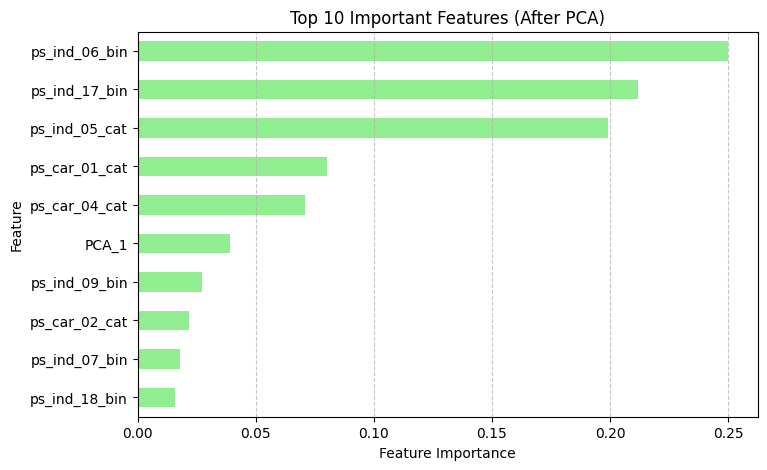

In [66]:
# =====================================================
# 4️⃣ Check feature importances (for PCA components + others)
# =====================================================
importances_pca = model_pca.feature_importances_
feature_names = X_train_final.columns

feat_imp_pca = pd.Series(importances_pca, index=feature_names).sort_values(ascending=False)

print("\nTop 10 Important Features (After PCA):")
print(feat_imp_pca.head(10))

# =====================================================
# 5️⃣ Visualize top 10 important features
# =====================================================
plt.figure(figsize=(8,5))
feat_imp_pca.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Important Features (After PCA)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [88]:
print("X_train_final shape:", X_train_final.shape)
print("y_train shape:", y_train.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_test shape:", y_test.shape)


X_train_final shape: (207346, 33)
y_train shape: (207346,)
X_test_final shape: (88863, 33)
y_test shape: (88863,)
